In [5]:
import random
import pandas as pd
import time

# Simulate 100 rows of sensor data
def simulate_sensor_data():
    return {
        "voltage": round(random.uniform(210, 240), 2),
        "current": round(random.uniform(5, 15), 2),
        "temperature": round(random.uniform(25, 45), 2),
        "timestamp": pd.Timestamp.now()
    }

# Generate dataset
df = pd.DataFrame([simulate_sensor_data() for _ in range(100)])
df.head()


,voltage,current,temperature,timestamp
0,232.10,7.99,33.90,2025-06-07 08:58:55.441420
1,225.27,5.93,32.64,2025-06-07 08:58:55.441420
2,236.37,8.74,31.60,2025-06-07 08:58:55.441420
3,217.80,7.44,44.40,2025-06-07 08:58:55.441420
4,229.67,11.86,29.77,2025-06-07 08:58:55.441420


In [6]:
def detect_anomaly(row):
    return row['voltage'] > 235 or row['temperature'] > 40

df['anomaly'] = df.apply(detect_anomaly, axis=1)
# ✅ Filter and save anomaly data (optional)
alerts = df[df['anomaly']]
alerts.to_csv("anomaly_logs.csv", index=False)
print("✅ Alerts saved to anomaly_logs.csv")



✅ Alerts saved to anomaly_logs.csv


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a load column
df['load'] = df['voltage'] * df['current']

X = df[['voltage', 'current', 'temperature']]
y = df['load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

predicted_load = model.predict(X_test)
for i, prediction in enumerate(predicted_load[:10]):
    print(f"🔮 Predicted Load {i+1}: {round(prediction, 2)} W")





🔮 Predicted Load 1: 2703.4 W
🔮 Predicted Load 2: 2342.15 W
🔮 Predicted Load 3: 1871.14 W
🔮 Predicted Load 4: 3003.69 W
🔮 Predicted Load 5: 3427.7 W
🔮 Predicted Load 6: 1821.98 W
🔮 Predicted Load 7: 3099.12 W
🔮 Predicted Load 8: 3244.19 W
🔮 Predicted Load 9: 1025.23 W
🔮 Predicted Load 10: 2547.74 W


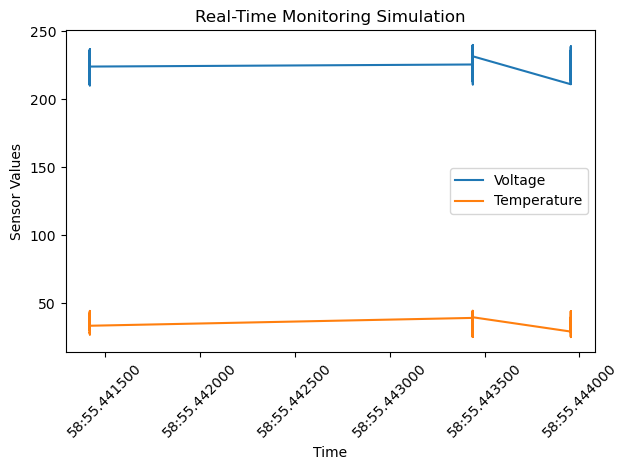

In [8]:
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['voltage'], label='Voltage')
plt.plot(df['timestamp'], df['temperature'], label='Temperature')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.title("Real-Time Monitoring Simulation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
alerts = df[df['anomaly'] == True]

for _, row in alerts.iterrows():
    print(f"⚠️ ALERT at {row['timestamp']}: High reading detected! Voltage={row['voltage']}V Temp={row['temperature']}°C")
print(f"⚠️ Total Alerts Detected: {df['anomaly'].sum()}")


⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=236.37V Temp=31.6°C
⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=217.8V Temp=44.4°C
⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=217.33V Temp=43.08°C
⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=235.6V Temp=30.66°C
⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=235.74V Temp=31.56°C
⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=224.23V Temp=42.31°C
⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=235.81V Temp=37.73°C
⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=236.85V Temp=37.52°C
⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=214.12V Temp=43.83°C
⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=210.45V Temp=43.05°C
⚠️ ALERT at 2025-06-07 08:58:55.441420: High reading detected! Voltage=234.18V Temp=

In [10]:
import sys
!{sys.executable} -m pip install paho-mqtt


Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip show paho-mqtt
import sys
print(sys.executable)



Name: paho-mqtt
Version: 2.1.0
Summary: MQTT version 5.0/3.1.1 client class
Home-page: http://eclipse.org/paho
Author: 
Author-email: Roger Light <roger@atchoo.org>
License: EPL-2.0 OR BSD-3-Clause
Location: C:\Users\vp380\AppData\Roaming\Python\Python312\site-packages
Requires: 
Required-by: 
C:\ProgramData\anaconda3\python.exe


In [12]:
import paho.mqtt.publish as publish
import json

for i in range(10):
    payload = {
        "voltage": round(random.uniform(220, 240), 2),
        "current": round(random.uniform(5, 15), 2),
        "temperature": round(random.uniform(30, 45), 2)
    }
    publish.single("grid/sensors", json.dumps(payload), hostname="broker.hivemq.com")
    print("📤 Sent:", payload)
    time.sleep(2)


📤 Sent: {'voltage': 230.84, 'current': 11.5, 'temperature': 34.9}
📤 Sent: {'voltage': 232.95, 'current': 12.77, 'temperature': 36.55}
📤 Sent: {'voltage': 226.41, 'current': 13.67, 'temperature': 43.4}
📤 Sent: {'voltage': 224.65, 'current': 14.62, 'temperature': 38.99}
📤 Sent: {'voltage': 228.69, 'current': 10.38, 'temperature': 39.17}
📤 Sent: {'voltage': 233.8, 'current': 8.91, 'temperature': 39.96}
📤 Sent: {'voltage': 228.72, 'current': 11.81, 'temperature': 37.2}
📤 Sent: {'voltage': 222.55, 'current': 9.24, 'temperature': 42.28}
📤 Sent: {'voltage': 224.45, 'current': 12.47, 'temperature': 39.66}
📤 Sent: {'voltage': 221.89, 'current': 8.85, 'temperature': 40.01}
